# Using [International Brain Laboratory](https://www.internationalbrainlab.com/) behavior data for an example analysis

Christopher S Krasniak, Cold Spring Harbor Laboratory, 2020-01-22

In order to encourage access and use the IBL data used for and released with the [bioRxiv](https://www.biorxiv.org/content/10.1101/2020.01.17.909838v2) paper detailing the standardized training of the IBL, the Outreach Working Group of the IBL created this tutorial. The purpose of this document is to encourage the use of IBL data, specifically as a resource for teaching the use of python for the analysis of neuroscience and psychology data. Many simple data analysis questions can be explored with this data set, a few examples of which are in the accompanying document DOCUMENT. We hope these questions will help future neuroscientists and psychologists explore this dataset and perhaps make their own unique discoveries as they learn to use python for data analysis.

To proceed with the tutorial, make sure you have completed the installation steps in the [README](https://github.com/cskrasniak/behavior_analysis_demo/blob/master/README.md)

What follows is a tutorial that can be used as an example of how to access the IBL data and perform a simple analysis to answer a simple question. The data used in this tutorial are from mice that have been trained on a basic visual detection task, please read the [paper](https://www.biorxiv.org/content/10.1101/2020.01.17.909838v2) to understand the dataset you will be working with.

## Question: Who performs more trials, male or female mice?

### Import packages
The first step, as with any python code, is to import all of the packages we will need to work with the data, this is a good set to start with when working with IBL data. You may need more or fewer for specific questions, but this is a good start.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datajoint as dj
import os
import matplotlib as mpl
from ibl_pipeline import action, subject, behavior, acquisition
from paper_behavior_functions import query_sessions

Please enter DataJoint username: cskrasniak
Connecting cskrasniak@datajoint.internationalbrainlab.org:3306
Connected to https://alyx.internationalbrainlab.org as chrisk


### Fetch the data we'll need
Now that that's all setup, the next thing we have to do is retrieve the data from the database. To do that we will be using [DataJoint](https://docs.datajoint.io/python/), we will be running queries that will return the data we are looking for, queries in DataJoint are run using mySQL syntax. Read more about DataJoint in the link above, and the IBL Data Architecture [here](https://www.biorxiv.org/content/10.1101/827873v1). If you are going to be running your own analyses, it will be useful to familarize yourself with using datajoint with specific tutorials on [using datajoint with IBL data](https://github.com/int-brain-lab/IBL-pipeline/tree/master/notebooks/notebooks_tutorial/202001_behavior_paper).

Included in the _simple_analysis_demo_ folder is the list of universially unique identifiers (UUIDs) of the mice we will use to answer our question, and we already imported a function `query_sessions` (last line above) to query the sessions that we will use data from.

In [2]:
# allows nice inline plotting
%matplotlib notebook 

To compare sex of mouse with how many trials they completed, we need to know how many trials there were in a session, and if the mice were male or female. I'll show you where we can find this.

In [3]:
## The describe method is handy for datajoint objects, it lets you know what type of data is in what object
behavior.TrialSet.describe()  # the number of trials completed per session is in behavior.TrialSet

# information about behavioral trials
-> acquisition.Session
---
n_trials             : int                          # total trial numbers in this set
n_correct_trials=null : int                          # number of the correct trials
trials_start_time    : float                        # start time of the trial set (seconds)
trials_end_time      : float                        # end time of the trial set (seconds)



'# information about behavioral trials\n-> acquisition.Session\n---\nn_trials             : int                          # total trial numbers in this set\nn_correct_trials=null : int                          # number of the correct trials\ntrials_start_time    : float                        # start time of the trial set (seconds)\ntrials_end_time      : float                        # end time of the trial set (seconds)\n'

In [4]:
subject.Subject.describe()  # the sex of the mouse is in subject.Subject


subject_uuid         : uuid                         
---
subject_nickname     : varchar(255)                 # nickname
sex                  : enum('M','F','U')            # sex
subject_birth_date=null : date                         # birth date
ear_mark=null        : varchar(255)                 # ear mark
-> [nullable] subject.Line.proj(subject_line="line_name")
-> [nullable] subject.Source.proj(subject_source="source_name")
protocol_number      : tinyint                      # protocol number
subject_description=null : varchar(1024)                
subject_ts=CURRENT_TIMESTAMP : timestamp                    



'subject_uuid         : uuid                         \n---\nsubject_nickname     : varchar(255)                 # nickname\nsex                  : enum(\'M\',\'F\',\'U\')            # sex\nsubject_birth_date=null : date                         # birth date\near_mark=null        : varchar(255)                 # ear mark\n-> [nullable] subject.Line.proj(subject_line="line_name")\n-> [nullable] subject.Source.proj(subject_source="source_name")\nprotocol_number      : tinyint                      # protocol number\nsubject_description=null : varchar(1024)                \nsubject_ts=CURRENT_TIMESTAMP : timestamp                    \n'

Now that we know where the information is, we can combine it and retrieve the data.

In [5]:
data_to_fetch =  behavior.TrialSet * subject.Subject
data_to_fetch

subject_uuid,session_start_time start time,n_trials total trial numbers in this set,n_correct_trials number of the correct trials,trials_start_time start time of the trial set (seconds),trials_end_time end time of the trial set (seconds),subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,protocol_number protocol number,subject_description,subject_ts
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,196,72,0.0,2764.65,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12 09:21:03,140,56,0.0,2775.9,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13 10:28:45,223,91,0.0,3265.18,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 09:37:17,55,22,0.0,1306.78,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 11:35:16,289,134,0.0,2759.22,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-15 10:29:21,141,60,0.0,2713.52,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-16 17:00:11,340,159,0.0,2692.64,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-19 09:12:02,224,95,0.0,2688.67,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-20 12:06:48,252,111,0.0,2915.64,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-21 11:21:03,269,85,0.0,2701.59,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33


In [6]:
## Fetch the data as a pandas dataframe 
# There's a lot of extraneous info in there, so we'll only fetch the interesting data types listed below
data = data_to_fetch.fetch('subject_uuid','session_start_time','n_trials','n_correct_trials','trials_end_time','sex',as_dict=True)  
data = pd.DataFrame(data)
data

,subject_uuid,session_start_time,n_trials,n_correct_trials,trials_end_time,sex
0,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,196,72,2764.65,F
1,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12 09:21:03,140,56,2775.90,F
2,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13 10:28:45,223,91,3265.18,F
3,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 09:37:17,55,22,1306.78,F
4,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 11:35:16,289,134,2759.22,F
...,...,...,...,...,...,...
14011,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-16 10:47:54,902,644,4495.77,U
14012,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-17 10:12:49,821,551,4386.03,U
14013,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-21 10:44:49,427,328,3130.53,U
14014,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-22 10:51:00,646,497,3614.32,U


In [7]:
## Let's make sure we only have male (M) and female(F) mice
for mouse_sex in data['sex']:
    if mouse_sex != 'M' and mouse_sex != 'F':
        print(mouse_sex) 

U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U


It looks like there are some sessions when something went wrong and the mouse's sex is marked as unknown (U) so we should probably just exclude those sessions.

In [8]:
mf_data = data[data['sex']!='U']
mf_data

,subject_uuid,session_start_time,n_trials,n_correct_trials,trials_end_time,sex
0,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,196,72,2764.65,F
1,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12 09:21:03,140,56,2775.90,F
2,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13 10:28:45,223,91,3265.18,F
3,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 09:37:17,55,22,1306.78,F
4,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 11:35:16,289,134,2759.22,F
...,...,...,...,...,...,...
13974,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-20 10:52:16,470,293,5347.38,M
13975,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-21 10:24:01,509,321,3770.27,M
13976,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-22 10:14:57,456,311,3797.27,M
13977,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-23 12:03:35,508,363,3165.10,M


In [9]:
## Let's double check to make sure we only have M and F
for mouse_sex in mf_data['sex']:
    if mouse_sex != 'M' and mouse_sex != 'F':
        print("We've got a third sex!") 

OK, looks like we've only got males and females now, lets first just take a quick look to get an idea if males or females do more trials. To do this we will just take the average trial number for all the male mice and the same for the female mice and print them out.

In [10]:
females = mf_data['sex'] == 'F'  # get a boolean array for if a mouse is female
males = ~females  # males are all mice that aren't females
nTrials_females = mf_data[females]['n_trials']  # first use females to restrict all the data down to females, then only take the n_trials column
nTrials_males = mf_data[males]['n_trials']
mean_f = np.mean(nTrials_females)  # python doesn't have built in functions for mean, so we are using one from numpy which we imported above
mean_m = np.mean(nTrials_males)

In [11]:
print(mean_f)
print(mean_m)

594.5615569647933
663.7040263715564


It looks like the males do slightly more trials than the females! This is just a first glance though, we should be a bit more rigorous and get some measure of the variability within each of these groups. maybe we can run some simple statistics on them too.

In [12]:
se_females = sp.stats.sem(nTrials_females)  # using the function for standard error from scipy imported above, specifically the stats package within scipy
se_males = sp.stats.sem(nTrials_males)
t, p = sp.stats.ttest_ind(nTrials_females, nTrials_males)  # calculating the t-stat and p-value from scipy 
print(se_females, se_males, t, p)

4.273889904720233 3.547630556296923 -11.99781781635443 5.4369291730861525e-33


WOW! Looks like they are definitely significantly different. Lets plot this in a simple bar graph to visualize it a bit better

<IPython.core.display.Javascript object>


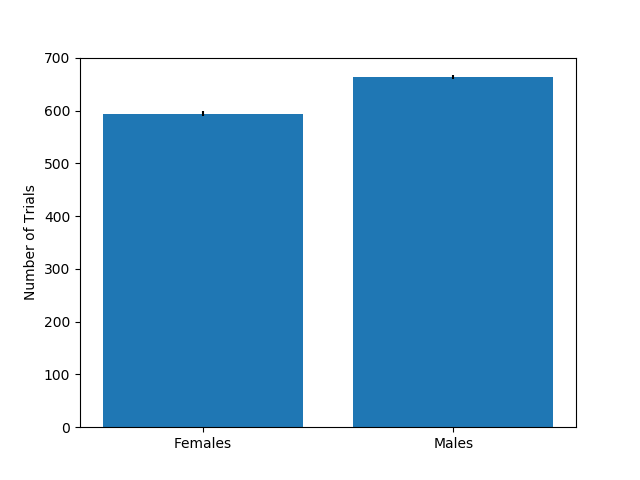

In [13]:
plt.figure('Male vs female by Sessions')  #instantiate the figure
plt.bar(['Females','Males'],[mean_f,mean_m,], yerr=[se_females,se_males])  # make a bar graph with error bars,
plt.gca().set_ylabel('Number of Trials')  # get current axes then set the ylabel of those axes to trial #
plt.show()


Though the difference isn't large, it seems like if you look at all sessions, female mice perform significantly fewer trials than male mice. However I'm not too convinced that lumping all the sessions together is the best way to compare this data. It might be more informative to get one mean for each mouse, then to compare how many trials a given mouse does and separate based on if that mouse is male or female.

In [14]:
## first lets get a list of the mice that we have data from
mouse_list = np.unique(mf_data['subject_uuid'])
print(len(mouse_list))

291


In [15]:
## now lets get a mean number of trials for each mouse
mouse_means = np.empty(len(mouse_list))  # initialize an array to put in our averages
mouse_sexes = []  # strings are easier to just use lists with, want a matching list for who is male who is female
for i in range(len(mouse_list)):
    mouse_means[i] = np.mean(mf_data[mf_data['subject_uuid']==mouse_list[i]]['n_trials'])  # complicated indexing here, try to work out why it works
    mouse_sexes.append(np.unique(mf_data[mf_data['subject_uuid']==mouse_list[i]]['sex'])[0])  # unique to just take one 'M' or 'F' and the [0] at the end becasue np.unique returns an array but we just want the letter

In [16]:
## lets separate the males and females and redo our stats with these new numbers
female_mice = [i == 'F' for i in mouse_sexes]
male_mice = [i == 'M' for i in mouse_sexes]
male_means = mouse_means[male_mice]
female_means = mouse_means[female_mice]
male_grand_mean = np.mean(male_means)
female_grand_mean = np.mean(female_means)
se_male_means = sp.stats.sem(male_means)
se_female_means = sp.stats.sem(female_means)
t, p = sp.stats.ttest_ind(female_means,male_means)
print(female_grand_mean, male_grand_mean, se_female_means, se_male_means, t, p)


529.0057319869369 623.086326835203 18.50905634581806 14.815251131706733 -3.917594690189143 0.00011168308187348966


It looks like these are still significantly different when analyzed this way, lets plot this a little bit differently to get a better idea of the spread of different trial numbers this time

<IPython.core.display.Javascript object>


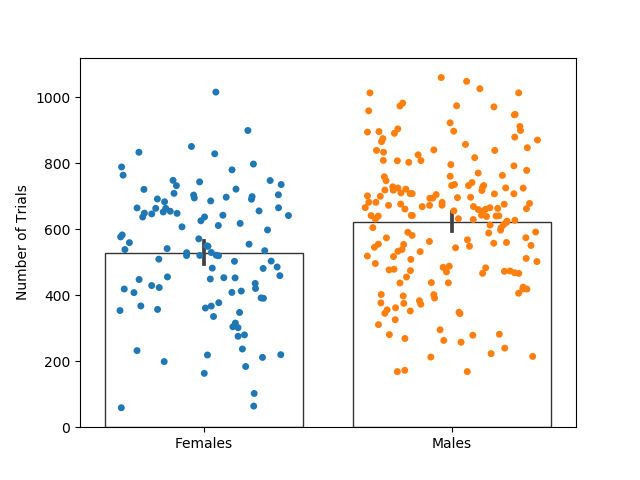

C:\Users\chris\Anaconda3\envs\dj_env\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing arguments to show(), other than passing 'block' by keyword, is deprecated 3.1, and support for it will be removed in 3.3.
  


In [17]:
plt.figure('Male vs Female by mice') # make a new figure, or else it plots on top of the last figure
ax = sns.stripplot(x=mouse_sexes, y=mouse_means, jitter = .35)  # uses the seaborn package which plots mostly using raw values and looks quite nice
ax = sns.barplot(x=mouse_sexes, y=mouse_means, facecolor=(1,1,1,0), edgecolor='.2')  # plot a bar on top of the strip plot
plt.gca().set_ylabel('Number of Trials')
plt.gca().set_xticklabels(['Females','Males'])
plt.show(ax)

*Congrats!* You finished this quick example of using the IBL behavior data. Don't stop here though, you can contrinue to work with this question if you want, there are plenty of ways to refine the simple analysis we have done here. See Below for a few more ideas of how to continue working on this question of if males and females perform different numbers of trials. Otherwise feel free to look at [this list]() for more analysis ideas, or to come up with more on your own!

### Continuing the male vs female analysis
It turns out that male mice tend to be a bit larger than female mice. Why might this matter? Because the mice are water-restricted they are thirsty, and the reward we give them is sugar water, you might think that the amount of sugar water reward that they are willing to drink is correlated to their body weight. Therefore female mice may just do fewer trials because they weigh less! How can we address this? One idea is to roughly weight-match the male and female mice. For example this would let you compare the number of trials a 25-27 gram male mouse completes to a female mouse in the same weight class. A slightly simpler way to do this would be to just normalize the number of trials each mouse does to its weight on that day.

In [18]:
## To do this you'll need the weighing information, that can be found in action.Weighing (action is imported above)
action.Weighing()


subject_uuid,weighing_time date time,weigh_uuid,weight weight,weighing_user username,weighing_ts
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-23 11:00:00,e9a8784d-f256-4418-b02d-dfc9e4179a74,23.81,valeria,2020-01-24 13:26:09
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-24 11:00:00,0eecdd85-694f-4c9a-859f-f9789101fffa,23.3,valeria,2020-01-24 13:07:13
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-25 11:00:00,ffb96da5-d5bf-47e0-9380-edaed4766546,23.77,valeria,2020-01-24 13:27:56
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-26 11:00:00,16cf3293-00b1-45df-8d43-f3fe7d8fd9f2,23.35,valeria,2020-01-24 13:08:16
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-27 11:00:00,b515e6a4-db2a-496f-b29d-de6f100f1df0,23.39,valeria,2020-01-24 13:21:26
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-30 11:00:00,95ff26dc-8c64-4c56-b852-ab6a21c9aac4,22.2,valeria,2020-01-24 13:19:44
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-31 11:00:00,4c1a2b3e-e0ba-4ae3-b091-ddf6ebe33f56,22.14,valeria,2020-01-24 13:12:22
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-08-01 11:00:00,40c82972-4ef2-4dd8-b8e0-9d1f7326dabc,22.24,valeria,2020-01-24 13:11:29
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-08-02 11:00:00,1d0063d1-2f56-4b52-ab21-287485444a22,22.12,valeria,2020-01-24 13:09:13
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-08-03 11:00:00,56260863-d42d-49cb-95b4-40ea9fbf72d4,22.36,valeria,2020-01-24 13:13:50


In [19]:
## Use this box to fetch the weighings for the mice 
weighings = action.Weighing.fetch('subject_uuid','weighing_time','weight', as_dict='True')# use the fetch method to get the subject_uuid, weighing_time, and weight for all weighings and set as_dict=True
weighings = pd.DataFrame(weighings) # convert the dictionary to a pandas DataFrame

In [20]:
## Check to see if the length of weighings and mf_data (our dataset we made above) is the same
print(len(weighings))
print(len(mf_data))

22642
13067


There should be more weighings than behavior sessions (length of mf_data), so we are going to have to prune these down so that the dates match between weighings and sessions, so we know how much the mouse weighed for a given session. To do this we are going to have to convert the time to the day using the .date() method because the session and weighing likely happened at different times. 

In [21]:
## add a column to the weighings DataFrame called date from the weighing_time values you'll need to use the pandas apply method and the date() method
weighings['date'] = weighings['weighing_time'].apply(lambda x: x.date())
weighings

,subject_uuid,weighing_time,weight,date
0,0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-23 11:00:00,23.81,2018-07-23
1,0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-24 11:00:00,23.30,2018-07-24
2,0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-25 11:00:00,23.77,2018-07-25
3,0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-26 11:00:00,23.35,2018-07-26
4,0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-27 11:00:00,23.39,2018-07-27
...,...,...,...,...
22637,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-17 10:12:49,21.32,2020-01-17
22638,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-20 10:11:17,21.30,2020-01-20
22639,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-21 10:44:50,21.30,2020-01-21
22640,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,2020-01-22 10:51:00,20.70,2020-01-22


In [22]:
## Do the same with session_start_time in mf_data
mf_data['date'] = mf_data['session_start_time'].apply(lambda x: x.date())
mf_data

C:\Users\chris\Anaconda3\envs\dj_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,subject_uuid,session_start_time,n_trials,n_correct_trials,trials_end_time,sex,date
0,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,196,72,2764.65,F,2019-08-10
1,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12 09:21:03,140,56,2775.90,F,2019-08-12
2,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13 10:28:45,223,91,3265.18,F,2019-08-13
3,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 09:37:17,55,22,1306.78,F,2019-08-14
4,00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 11:35:16,289,134,2759.22,F,2019-08-14
...,...,...,...,...,...,...,...
13974,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-20 10:52:16,470,293,5347.38,M,2020-01-20
13975,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-21 10:24:01,509,321,3770.27,M,2020-01-21
13976,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-22 10:14:57,456,311,3797.27,M,2020-01-22
13977,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,2020-01-23 12:03:35,508,363,3165.10,M,2020-01-23


Now we have to line up the data. Each row in each frame has a subject_uuid and a date, so we need to find when they match, and combine that data. It's possible that there are multiple weighings on a day when there is a single session, but for our purposes its reasonable to assume the mouse's weight does not change dramatically within a given day, so we can just take the first weighing we can find that matches. Because there are fewer training sessions than weighings, we will loop through the training sessions, then search for a match in the weighings data (search is much faster than looping over the whole dataset). We can just add the weights on as a new column on the mf_data to put it all in one place. Trying to find the matching variable set can be tricky without looping over both dataframes, if you get stuck here's a [hint](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values). Using this will be slow, but using a nested for loop (a loop in a loop) would take a realllly long time.

In [23]:
mf_data = mf_data.reset_index() # this will make it easier to loop over 
## First add a new empty column to mf_data
mf_data['weight'] = np.empty(len(mf_data))
## Next loop over mf_data ... This may take a few minutes
for i in range(len(mf_data)):
    ## then take the subject_uuid and the session_date for that session
    session_uuid = mf_data['subject_uuid'][i] 
    session_date = mf_data['date'][i]
    ## and now find a matching index in the weighings DataFrame, and put it in a temporary variable
    temp_weight = weighings[((weighings['subject_uuid'] == session_uuid) & (weighings['date'] == session_date))]['weight']
    ## there may be multiple sessions in a day that match, or multiple weights in a day for a single session, so lets just average
    ## the weights (if there's only one then the average is still correct), then put them in at mf_data['weight'][i]
    mf_data['weight'][i] = np.mean(temp_weight)
    

C:\Users\chris\Anaconda3\envs\dj_env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Whew! Now that we have sessions each associated with a weight we can start looking at how weight is associated with trial number, but first lets check to make sure that all of our weights are reasonable. One way to do that is to just look if all the weights are greater than 0.

In [24]:
len(mf_data) - np.sum([mf_data['weight']> 0])  ## check if all sessions have a weight over 0

132

Looks like there are a few weights that don't look quite right, its not too many compared to all the data we have though,  so lets just get rid of those data points.

In [25]:
## remove the values not greater than 0
print(len(mf_data))  # see how big the frame is before
mf_data = mf_data[mf_data['weight'] > 0]
print(len(mf_data))  # see how big it is after

13067
12935


Ok, now we have a good dataset to work off of. Let's start off with the easier step first, this time with a bit less guidance. Here try plotting the same figure as 'Males vs females by Sessions' but normalize the trial numbers completed to the mouse's weight that session.

0.28273135709824104 0.18131828321505383 7.08571220570291 1.4549940084355997e-12


<IPython.core.display.Javascript object>


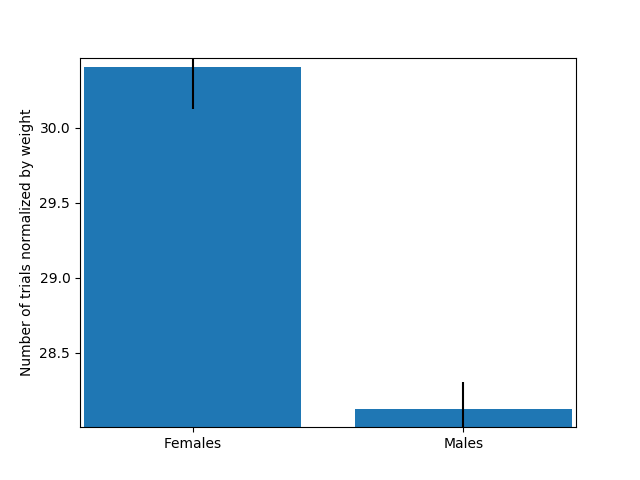

In [26]:
mf_data['norm_trial_num'] = mf_data['n_trials']/mf_data['weight']

females = mf_data['sex'] == 'F'  # get a boolean array for if a mouse is female
males = ~females  # males are all mice that aren't females
nTrials_females = mf_data[females]['norm_trial_num']  # first use females to restrict all the data down to females, then only take the n_trials column
nTrials_males = mf_data[males]['norm_trial_num']
mean_f = np.mean(nTrials_females)  # python doesn't have built in functions for mean, so we are using one from numpy which we imported above
mean_m = np.mean(nTrials_males)
se_females = sp.stats.sem(nTrials_females)  # using the function for standard error from scipy imported above, specifically the stats package within scipy
se_males = sp.stats.sem(nTrials_males)
t, p = sp.stats.ttest_ind(nTrials_females, nTrials_males)  # calculating the t-stat and p-value from scipy 
print(se_females, se_males, t, p)
plt.figure('Normalized Male vs Female by Sessions')  #instantiate the figure
plt.bar(['Females','Males'],[mean_f,mean_m,], yerr=[se_females,se_males])  # make a bar graph with error bars,
plt.gca().set_ylabel('Number of trials normalized by weight')  # get current axes then set the ylabel of those axes to trial #
plt.show()


It looks like the Females are punching above their weight class! This is a pretty interesting finding, and quite surprising given how strong an effect we had in the other direction when we didn't take weight into consideration. The main caveat for me in this graph though is that it isn't all that interpretable. The units of the vertical axis are number of trials per gram, which is not very meaningful. But now that we know there is something interesting here, we can dig a bit deeper. Let's start by graphing this in the more interpretable way of grouping into different actual weight classes and plotting each of those so we can compare using the proper unit of # of trials.

In [27]:
## lets start by making the weight classes
weights = mf_data['weight']  # first get the weights 
print(min(weights),max(weights))  # then look to see what the range of weights is


0.6565 21351.0


In [28]:
## looks like there are some weird weights in there, lets make sure weights are reasonable for a mouse 10 > x < 50
mf_data = mf_data[mf_data['weight'] > 10]  # take out values below 10
mf_data = mf_data[mf_data['weight'] < 50]  # take out values over 50
weights = mf_data['weight']  # remake the weights variable
print(min(weights),max(weights))  # look at the range again


10.16 34.62


In [29]:
## That looks more reasonable, now lets make 7 bins that span the whole weight range
weight_limits = np.linspace(min(weights), max(weights), 8)  # make 8 limits for 7 ranges
weight_limits = np.round(weight_limits,decimals=2)
weight_classes = [str(weight_limits[i+1]) for i in range(len(weight_limits)-1)]
weight_classes

['13.65', '17.15', '20.64', '24.14', '27.63', '31.13', '34.62']

In [30]:
## Now we are going to add one more column to mf_data to put in which weight class the mice are in. 
## We'll use weight class names from boxing to label which class they are in
mf_data = mf_data.reset_index() # this will make it easier to loop over 
mf_data['weight_class'] = 'y'
for i  in range(len(mf_data)): # loop through mf_data and assign a weightclass to each session
    if mf_data['weight'][i] <= weight_limits[1]:
        mf_data['weight_class'][i] =  weight_classes[0]
    elif mf_data['weight'][i] <= weight_limits[2]:
        mf_data['weight_class'][i] =  weight_classes[1]
    elif mf_data['weight'][i] <= weight_limits[3]:
        mf_data['weight_class'][i] =  weight_classes[2]
    elif mf_data['weight'][i] <= weight_limits[4]:
        mf_data['weight_class'][i] =  weight_classes[3]
    elif mf_data['weight'][i] <= weight_limits[5]:
        mf_data['weight_class'][i] =  weight_classes[4]
    elif mf_data['weight'][i] <= weight_limits[6]:
        mf_data['weight_class'][i] =  weight_classes[5]
    elif mf_data['weight'][i] > weight_limits[6]:
        mf_data['weight_class'][i] =  weight_classes[6]

C:\Users\chris\Anaconda3\envs\dj_env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chris\Anaconda3\envs\dj_env\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\chris\Anaconda3\envs\dj_env\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [31]:
mf_data['weight'][395]

27.8

<IPython.core.display.Javascript object>


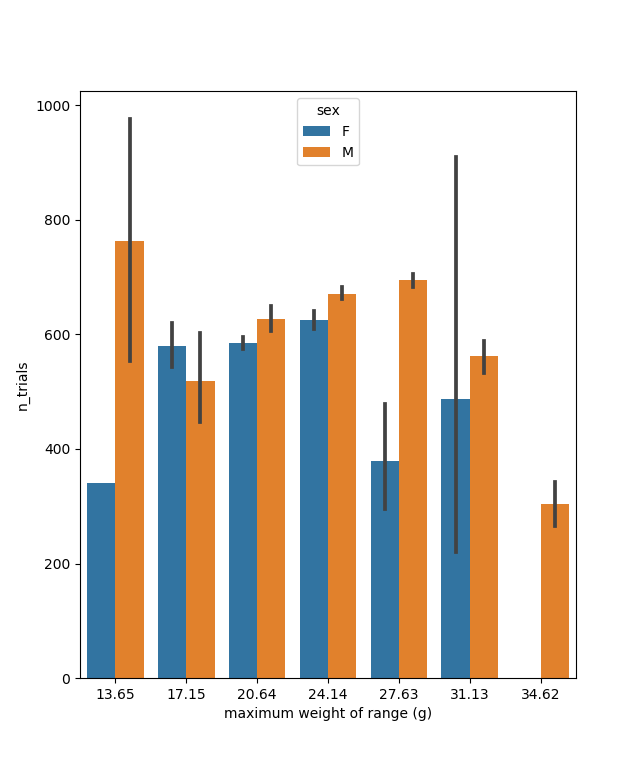

Text(0.5, 0, 'maximum weight of range (g)')

In [32]:
## now lets plot this based using seaborn. We want two different bars ('M' and 'F') for each weight class
plt.figure("Trial Numbers by Weight Class")
ax = sns.barplot(x='weight_class', y='n_trials', hue='sex', data=mf_data)
plt.gca().set_xlabel('maximum weight of range (g)')  # get current axes then set the ylabel of those axes to trial #


0.22110437042226563 0.1548624027493196 8.45102538501701 3.1945532425546183e-17


<IPython.core.display.Javascript object>


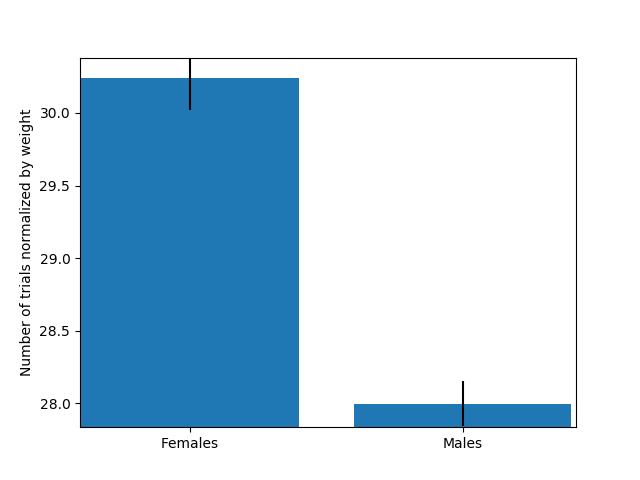

In [33]:
mf_data['norm_trial_num'] = mf_data['n_trials']/mf_data['weight']

females = mf_data['sex'] == 'F'  # get a boolean array for if a mouse is female
males = ~females  # males are all mice that aren't females
nTrials_females = mf_data[females]['norm_trial_num']  # first use females to restrict all the data down to females, then only take the n_trials column
nTrials_males = mf_data[males]['norm_trial_num']
mean_f = np.mean(nTrials_females)  # python doesn't have built in functions for mean, so we are using one from numpy which we imported above
mean_m = np.mean(nTrials_males)
se_females = sp.stats.sem(nTrials_females)  # using the function for standard error from scipy imported above, specifically the stats package within scipy
se_males = sp.stats.sem(nTrials_males)
t, p = sp.stats.ttest_ind(nTrials_females, nTrials_males)  # calculating the t-stat and p-value from scipy 
print(se_females, se_males, t, p)
plt.figure('Normalized Male vs Female by Sessions II')  #instantiate the figure
plt.bar(['Females','Males'],[mean_f,mean_m,], yerr=[se_females,se_males])  # make a bar graph with error bars,
plt.gca().set_ylabel('Number of trials normalized by weight')  # get current axes then set the ylabel of those axes to trial #
plt.show()
